# Распределение гумбеля

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps

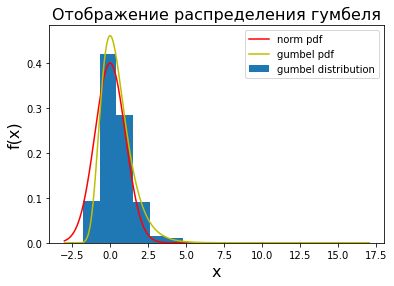

In [39]:
# параметры генерации случайных выборок
mu, beta, sigma = 0, 0.8, 1

# генерируем нормальное распределение с параметрами mu и sigma
norm_distribution = sps.norm(loc=mu, scale=sigma)
gumbel_distribution = sps.gumbel_r(mu, beta)
sample = np.random.gumbel(mu, beta, size=1000)

# строим гистограмму по сгенерированной выборки, а также теоретическую плотность вероятности
plt.title("Отображение распределения гумбеля", fontsize=16)
x = np.linspace(-3, 17, 1000)
pdf = norm_distribution.pdf(x)
plt.plot(x, pdf, label='norm pdf', color='r')
pdf1 = gumbel_distribution.pdf(y)
plt.plot(x, pdf1, label='gumbel pdf', color='y')
plt.hist(sample, label='gumbel distribution', density=True)
plt.legend()
plt.ylabel("f(x)", fontsize=16)
plt.xlabel("x", fontsize=16)
plt.show()

## Генерируем случайную выорку объемом 1000
Для того, чтобы выборка была макимально случана, на вход в функцию get_sample_mean поступает определенный набор данных, уже размером 1000, но в последствии, я делаю ее еще более случайной с помощью функции shuffle().

In [9]:
def get_sample_mean(data:list, N:int) -> list: 
    """
    генерирует случайную целочисленную выборку размером 1000
    """
    np.random.shuffle(data)
    sample = np.random.randint(0, len(data) - N, 1000)
    sample_mean = []
    for index in sample:
        mean = np.mean(data[index:index + N])
        sample_mean.append(mean)
    return sample_mean

Далее идет основная функция, созданная для упрощения многократного вызова. В ней строится гистограмма случайного распределения и поверх нее накладывается плотность нормального распределения и распределения гумбеля.

In [40]:
def main(N:int, mu:float, beta:float):
    """
    ядро задачи обернутое в функцию
    """
    # создаем случайную выборку гумбеля по заданным параметрам объемом 1000
    random_data = np.random.gumbel(mu, beta, size=1000)
    mu, sigma = sps.norm.fit(random_data)
    
    # строим гистограмму и функцию плотности нормального и гумбельского распределения
    plt.figure(figsize=(10, 10), )
    plt.subplot(2, 1, 1)
    plt.title("Гистограмма распределения гумбеля выборки %d" % N, fontsize=16)
    
    histogram = plt.hist(get_sample_mean(random_data, N=N), bins=30, label='gumbel distribution', density=True)[0]
    
    # функция плотности распределения гумбеля
    x1 = np.linspace(sps.gumbel_r.ppf(0.01), sps.gumbel_r.ppf(0.99), 30)
    plt.plot(x1, sps.gumbel_r.pdf(x1), color='y', label='gumbel_r pdf')
    
    # функция плотности нормального распределения
    points = np.linspace(sps.norm.ppf(0.01, loc=mu, scale=sigma), sps.norm.ppf(0.9999, loc=mu, scale=sigma), 30)
    pdf = sps.norm.pdf(points, loc=mu, scale=sigma)
    plt.plot(points, pdf, color='r', label='norm pdf')
    
    plt.tight_layout()
    plt.legend()
    plt.grid()
    plt.xlabel("x", fontsize=16)
    plt.ylabel("f(x)", fontsize=16)

    # строим биплот для сравнения распределений
    plt.subplot(2, 1, 2)
    plt.title("Отображение распределения через биплот %d" % N, fontsize=16)

    x = (pdf - np.min(pdf)) / (np.max(pdf) - np.min(pdf))
    y = (histogram - np.min(histogram)) / (np.max(histogram) - np.min(histogram))

    plt.scatter(x, y)
    plt.plot([0, 1], [0, 1], color='r')
    plt.xlabel("pdf-theoretical", fontsize=16)
    plt.ylabel("pdf-sample mean", fontsize=16)
    plt.tight_layout()
    plt.grid()
    
    print(f"sigma = {sigma}, mu = {mu}, mean = {np.mean(get_sample_mean(random_data, N=N))}")
    plt.show()

sigma = 1.0674829215614805, mu = 0.470537988043325, mean = 0.43350825947543276


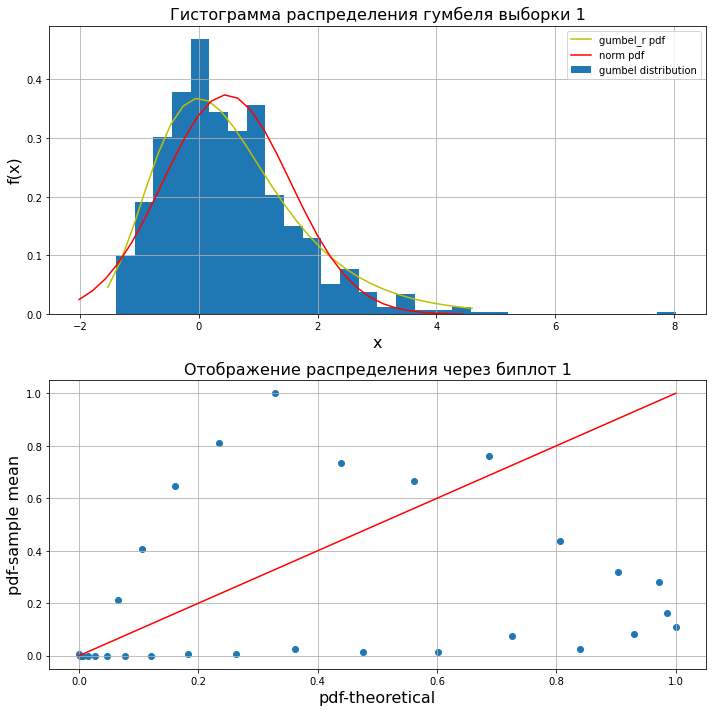

In [42]:
main(1, 0, 0.8)

sigma = 1.0355062828614423, mu = 0.4584992070858908, mean = 0.4691457374130057


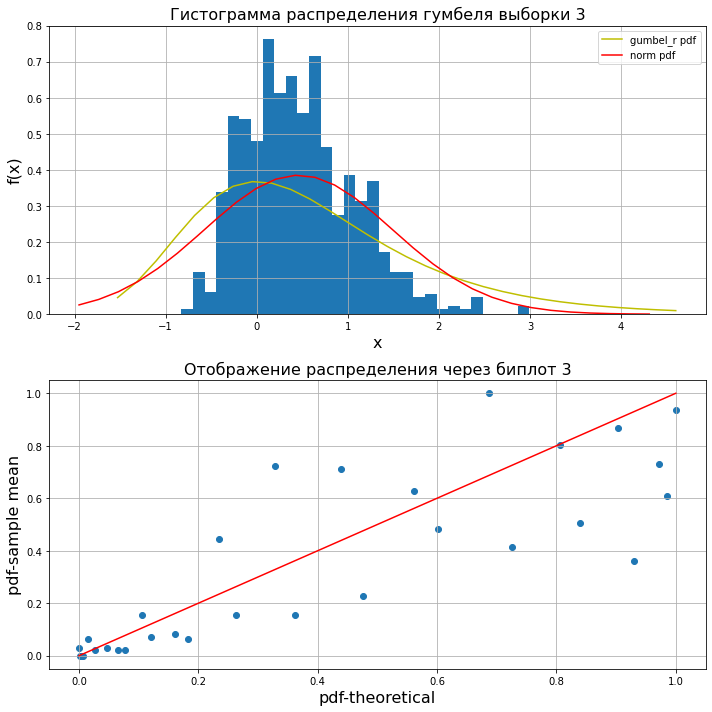

In [23]:
main(3, 0, 0.8)

sigma = 1.0578175052360441, mu = 0.4938653490408398, mean = 0.49827705426940033


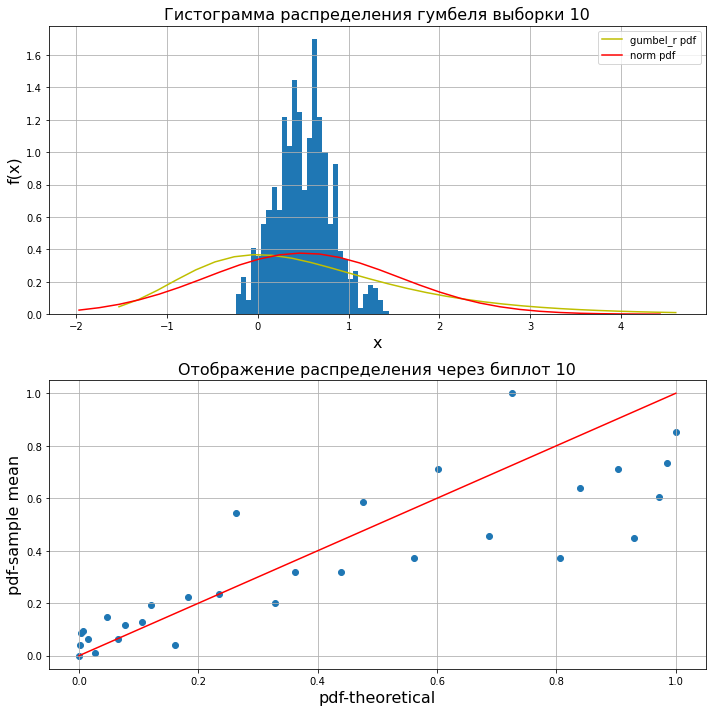

In [24]:
main(10, 0, 0.8)

## Вывод

Из графиков кажется, что точность снижается. На самом деле точность растет, а точнее, с увеличением N удается приблизить лучше значение mu, но при это значение sigma наоборот становится хуже. Но если построить биплот, то видно, что апроксимация улучшается. С увеличением N распределение все больше становится похожим на нормально, как и следовало ожидать из центральной предельной теоремы. Также можно заметить, что с ростом N уменьшается дисперсия распределения выборочных средних.